## PySCF with OpenFermion

Oxygen bond length optimisation

Based on the example from [https://github.com/quantumlib/OpenFermion-PySCF](https://github.com/quantumlib/OpenFermion-PySCF)

In [24]:
import io
from ase.io.xyz import write_xyz
from ase.visualize import view
from ase.build import molecule
atoms = molecule('O2')
view(atoms, viewer='x3d')

In [25]:
def create_molecule(bond_length: float):
    f = io.StringIO()
    atoms[0].c=0.
    atoms[1].c=bond_length
    atoms.write(f,format='xyz')
    return [(a.split()[0],(float(a.split()[1]),float(a.split()[2]),float(a.split()[3]))) for a in f.getvalue().split('\n')[2:-1]]

[('O', (0.0, 0.0, 0.0)), ('O', (0.0, 0.0, 1.1))]


At bond length of 1.2 angstrom, molecular oxygen has:
Hartree-Fock energy of -147.55043891006417 Hartree.


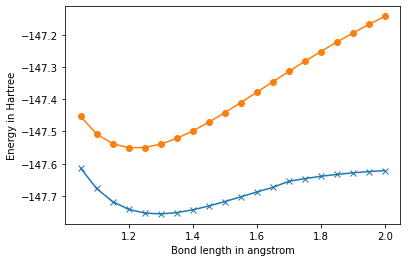

In [32]:
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
n_points = 20
bond_length_interval = 1.0 / n_points

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
best_bond_length=None
best_hf_energy=None
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point) + 1.0
    bond_lengths += [bond_length]
    geometry = create_molecule(bond_length)
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run pyscf.
    molecule = run_pyscf(molecule,
                         run_scf=run_scf,
                         run_mp2=run_mp2,
                         run_cisd=run_cisd,
                         run_ccsd=run_ccsd,
                         run_fci=run_fci)

    # Print out some results of calculation.
    #print(f'\nAt bond length of {bond_length} angstrom, molecular oxygen has:')
    #print(f'Hartree-Fock energy of {molecule.hf_energy} Hartree.')
    #print(f'MP2 energy of {molecule.mp2_energy} Hartree.')
    #print(f'FCI energy of {molecule.fci_energy} Hartree.')
    #print(f'Nuclear repulsion energy between protons is {molecule.nuclear_repulsion} Hartree.')
    #for orbital in range(molecule.n_orbitals):
    #    print(f'Spatial orbital {orbital} has energy of {molecule.orbital_energies[orbital]} Hartree.')
    
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]
    
    if not best_bond_length:
        best_bond_length = bond_length
        best_hf_energy = molecule.hf_energy
    elif best_hf_energy > molecule.hf_energy:
        best_hf_energy = molecule.hf_energy
        best_bond_length = bond_length
        

print(f'\nAt bond length of {best_bond_length} angstrom, molecular oxygen has:')
print(f'Hartree-Fock energy of {best_hf_energy} Hartree.')
        
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.show()